In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [12]:
data = pd.read_csv("segmentation data.csv")

In [5]:
!pip install scikit-learn-extra


In [13]:
print(data.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [14]:
print(data.describe())

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

In [15]:
print(data.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [16]:
data.dropna(inplace=True)


In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [18]:
def find_optimal_k_kmeans(data, max_k):
    distortions = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K in KMeans')
    plt.show()

C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

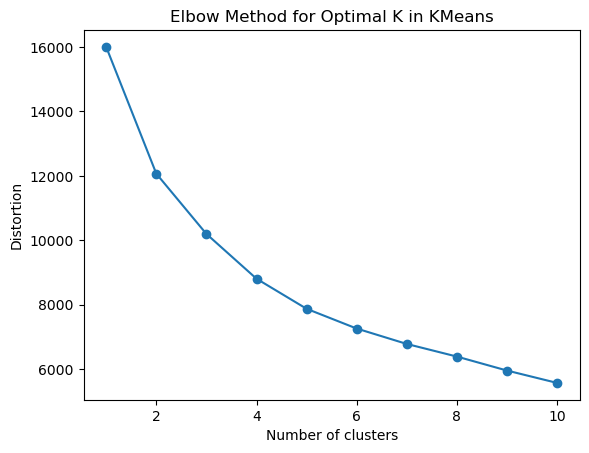

In [19]:
find_optimal_k_kmeans(scaled_data, 10)


C:\Users\YASWANTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


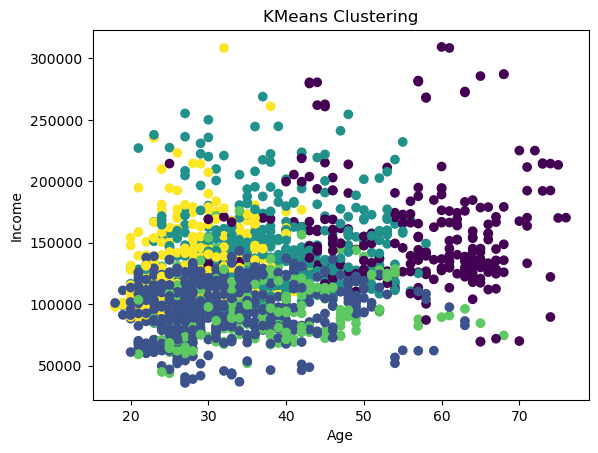

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
data['KMeans_Cluster'] = kmeans.labels_

# Visualize clusters using two features
plt.scatter(data['Age'], data['Income'], c=data['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.show()

In [21]:
def find_optimal_k_kmedoids(data, max_k):
    silhouette_scores = []
    for i in range(2, max_k + 1):
        kmedoids = KMedoids(n_clusters=i, random_state=42)
        kmedoids.fit(data)
        silhouette_scores.append(silhouette_score(data, kmedoids.labels_))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Elbow Method for Optimal K in KMedoids')
    plt.show()

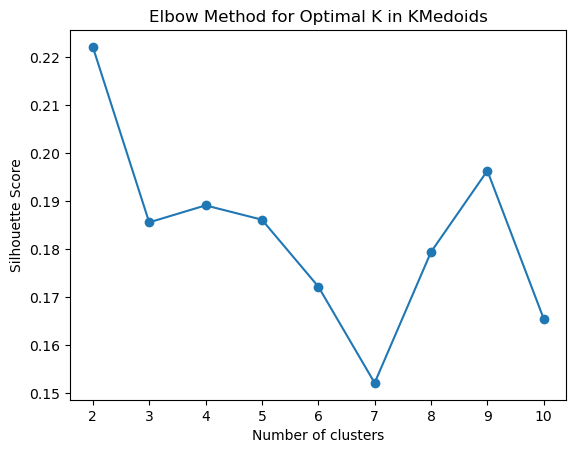

In [22]:
find_optimal_k_kmedoids(scaled_data, 10)


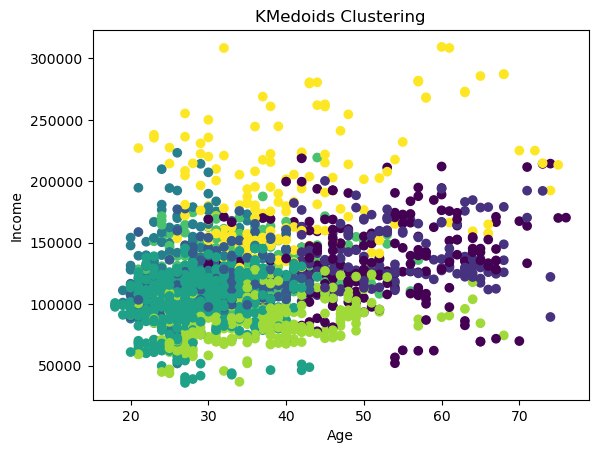

In [23]:
kmedoids = KMedoids(n_clusters=8, random_state=42)
kmedoids.fit(scaled_data)
data['KMedoids_Cluster'] = kmedoids.labels_

# Visualize clusters using two features
plt.scatter(data['Age'], data['Income'], c=data['KMedoids_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMedoids Clustering')
plt.show()